# Will vaccination able to compress Covid cases?  
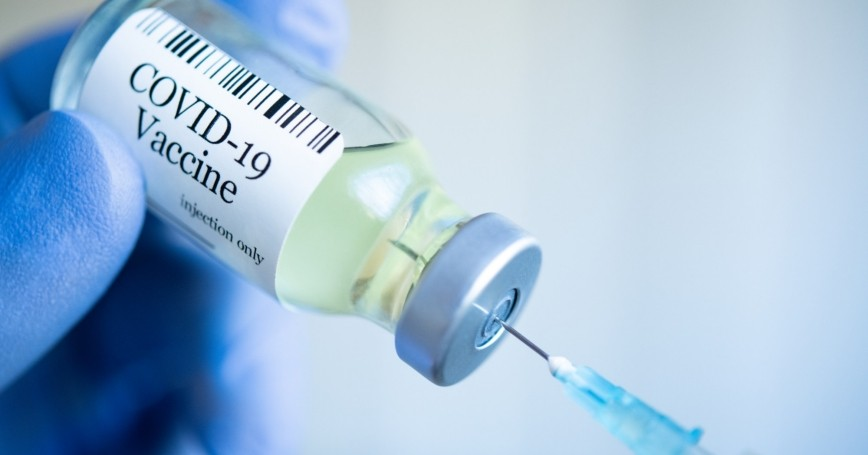

[](http://)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df1=pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')
df2=pd.read_csv('../input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv')
df3=pd.read_csv('/kaggle/input/covid19-global-dataset/worldometer_coronavirus_summary_data.csv')
df4=pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv')
dk=df3[['country','total_cases_per_1m_population','total_tests_per_1m_population']]
df2=pd.merge(df2,dk, on='country')

## Worst affected countries by total number of cases

In [ ]:
cumulative_total_cases_country_wise=df2.groupby(['country'])['cumulative_total_cases'].max().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(cumulative_total_cases_country_wise, y="cumulative_total_cases", x="country",color='country', log_y=False)
fig.update_layout(title='Worst affected countries')
fig.show()

## Daily cases in worst affected countries

In [ ]:
worst_affected_countries=['USA','India','Brazil', 'France']
worst_affect_daily_case=df2[df2['country'].isin(worst_affected_countries)]
fig = px.line(worst_affect_daily_case, x="date", y="daily_new_cases",color='country',width=800, height=400)
fig.show()

**Out of all India is worst suffering country**  
But the population of India is very high in compare to other countries, maybe looking at cases according to population give a better picture. The worst affected countries are USA, India, Brazil and France

## Total cases per 1M population

In [ ]:
worst_affected_countries=['USA','India','Brazil','France']

worst_affect_per_million_view=df2[df2['country'].isin(worst_affected_countries)]
worst_affect_per_million_view_df=worst_affect_per_million_view.groupby('country')['total_cases_per_1m_population'].max().reset_index()
fig = px.bar(worst_affect_per_million_view_df, y="total_cases_per_1m_population", x="country",color='country', log_y=False)
fig.update_layout(title='Total cases per 1M population')
fig.show()

The total cases per million of India is far too low in comparison to USA, France and Brazil. But the fact is not hidden that India is still suffering the most even being so low in terms of cases per million  
So which country is worst effect with respect to its population? We can find it by analyzng the highest number of total cases per million population

## Highest total cases per 1M population country wise

In [ ]:
worst_effect_per_million=pd.DataFrame(df2.groupby(['country'])['total_cases_per_1m_population'].max().sort_values(ascending=False).head(10).reset_index())
fig = px.bar(worst_effect_per_million, y="total_cases_per_1m_population", x="country",color='country', log_y=False)
fig.update_layout(title='Highest total cases per 1M population country wise')
fig.show()

So countries like Andorra, Montenegro including USA is the worst affected country population wise
## Highest number of cases in one day country wise

In [ ]:
highest_daily_cases_in_country_wise=df2.groupby(['country'])['daily_new_cases'].max().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(highest_daily_cases_in_country_wise, y="daily_new_cases", x="country",color='country', log_y=False)
fig.update_layout(title='Highest number of cases in one day country wise')
fig.show()

## Highest number of vaccination in one day country wise

In [ ]:
highest_daily_vaccination_country_wise=df1.groupby(['country'])['daily_vaccinations'].max().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(highest_daily_vaccination_country_wise, y="daily_vaccinations", x="country",color='country', log_y=False)
fig.update_layout(title='Highest number of vaccination in one day country wise')
fig.show()

## Countries with highest percentage of people fully vaccinated  
By finding this we will find the countries which has highest number of people got fully vaccinated and by there we will find if the number of cases goes down after vaccination or if another wave hit the country or not after vaccination!

In [ ]:
dfcountr=df1.groupby(['country'])['people_fully_vaccinated_per_hundred'].max().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(dfcountr, y="people_fully_vaccinated_per_hundred", x="country",color='country', log_y=False)
fig.update_layout(title='Percentage of people fully vaccinated country wise')
fig.show()

In [ ]:
df1['date']=pd.to_datetime(df1['date'])
df2['date']=pd.to_datetime(df2['date'])

In [ ]:
dfGibraltar=pd.merge(df2[df2['country']=='Gibraltar'][['date','daily_new_cases']],df1[df1['country']=='Gibraltar'][['date','daily_vaccinations']], on=['date'], how='left')
fig = make_subplots(rows=2, cols=1,subplot_titles=('Daily new cases in Gibraltar','Daily vaccinations in Gibraltar'))
fig.add_trace(go.Bar(x=dfGibraltar['date'],y=dfGibraltar['daily_new_cases'],showlegend=False),
              row=1, col=1)
fig.add_trace(go.Bar(x=dfGibraltar['date'],y=dfGibraltar['daily_vaccinations'],showlegend=False),
              row=2, col=1)
fig.show()

In [ ]:
dfIsreal=pd.merge(df2[df2['country']=='Israel'][['date','daily_new_cases']],df1[df1['country']=='Israel'][['date','daily_vaccinations']], on=['date'], how='left')
fig = make_subplots(rows=2, cols=1,subplot_titles=('Daily new cases in Israel','Daily vaccinations in Israel'))
fig.add_trace(go.Bar(x=dfIsreal['date'],y=dfIsreal['daily_new_cases'],showlegend=False),
              row=1, col=1)
fig.add_trace(go.Bar(x=dfIsreal['date'],y=dfIsreal['daily_vaccinations'],showlegend=False),
              row=2, col=1)
fig.show()

In [ ]:
dfChile=pd.merge(df2[df2['country']=='Chile'][['date','daily_new_cases']],df1[df1['country']=='Chile'][['date','daily_vaccinations']], on=['date'], how='left')
fig = make_subplots(rows=2, cols=1,subplot_titles=('Daily new cases in Chile','Daily vaccinations in Chile'))
fig.add_trace(go.Bar(x=dfChile['date'],y=dfChile['daily_new_cases'],showlegend=False),
              row=1, col=1)
fig.add_trace(go.Bar(x=dfChile['date'],y=dfChile['daily_vaccinations'],showlegend=False),
              row=2, col=1)
fig.show()

In [ ]:
dfUAE=pd.merge(df2[df2['country']=='United Arab Emirates'][['date','daily_new_cases']],df1[df1['country']=='United Arab Emirates'][['date','daily_vaccinations']], on=['date'], how='left')
fig = make_subplots(rows=2, cols=1,subplot_titles=('Daily new cases in United Arab Emirates','Daily vaccinations in United Arab Emirates'))
fig.add_trace(go.Bar(x=dfUAE['date'],y=dfUAE['daily_new_cases'],showlegend=False),
              row=1, col=1)
fig.add_trace(go.Bar(x=dfUAE['date'],y=dfUAE['daily_vaccinations'],showlegend=False),
              row=2, col=1)
fig.show()

**Number of cases in countries like Gibraltar and Israel are significantly compressed after vaccine started and no new wave has been seen after 95% of people are vaccinated in Gibraltar and around 60% of population in Isreal is fully vaccinated.**    
However countries like Chile and United Arab Emirates have seen new wave and number of cases are not going down this maybe because 90% of the vaccine used in Chile is **Sinovac** which is been questioned for its efficiency. UAE also used Sinovac in there country which doesn't seems like it made much effect on number of daily cases.

## Vaccine variety percentage of Chile

In [ ]:
vaccine_perct=df4[df4['location']=='Chile'].groupby(['vaccine'])['total_vaccinations'].sum().reset_index()

fig = px.pie(vaccine_perct, values="total_vaccinations", names="vaccine",template="seaborn")

fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

## Let's take a look at USA and India which are worst effect countries in the world

In [ ]:
dfUSA=pd.merge(df2[df2['country']=='USA'][['date','daily_new_cases']],df1[df1['country']=='United States'][['date','daily_vaccinations']], on=['date'], how='left')
fig = make_subplots(rows=2, cols=1,subplot_titles=('Daily new cases in USA','Daily vaccinations in USA'))
fig.add_trace(go.Bar(x=dfUSA['date'],y=dfUSA['daily_new_cases'],showlegend=False),
              row=1, col=1)
fig.add_trace(go.Bar(x=dfUSA['date'],y=dfUSA['daily_vaccinations'],showlegend=False),
              row=2, col=1)
fig.show()

In [ ]:
dfIndia=pd.merge(df2[df2['country']=='India'][['date','daily_new_cases']],df1[df1['country']=='India'][['date','daily_vaccinations']], on=['date'], how='left')
fig = make_subplots(rows=2, cols=1,subplot_titles=('Daily new cases in India','Daily vaccinations in India'))
fig.add_trace(go.Bar(x=dfIndia['date'],y=dfIndia['daily_new_cases'],showlegend=False),
              row=1, col=1)
fig.add_trace(go.Bar(x=dfIndia['date'],y=dfIndia['daily_vaccinations'],showlegend=False),
              row=2, col=1)
fig.show()

USA has somewhat controlled there number of cases, they are using Pfizer and Mederna vaccine, however USA still has long way to go.  
India, even being biggest manufacturer of vaccine and doing vaccination on a large scale still struggling a lot because of its population, and it doesn't seems to stop any time soon.

## Vaccine variety percentage of USA

In [ ]:
vaccine_perct=df4[df4['location']=='United States'].groupby(['vaccine'])['total_vaccinations'].sum().reset_index()

fig = px.pie(vaccine_perct, values="total_vaccinations", names="vaccine",template="seaborn")

fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

**Yes** Vaccination is able to compress Covid cases when high efficient vaccines were used, like in USA. In case of Chile and UAE some low efficient vaccines were used that caused the cases to rise. Country like India need to rise the number of daily vaccination according to its population.  

In [ ]:
df4['location'].unique()

In [ ]:
vaccine_perct=df4[df4['location']=='Czechia'].groupby(['vaccine'])['total_vaccinations'].sum().reset_index()

fig = px.pie(vaccine_perct, values="total_vaccinations", names="vaccine",template="seaborn")

fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()